In [66]:
# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [67]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import time
import matplotlib.pyplot as plt

In [68]:
from data_helpers.wine_quality_data_helper import load_wine_quality_data
from data_helpers.mnist_data_helper import load_mnist_data

In [69]:
class GaussianMixtureWrapper:
    NAME = 'GMM'
    def __init__(self, n_components):
        self.n_components = n_components
        self.model = GaussianMixture(n_components=n_components)

    def fit(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)
    
    def bic(self, X):
        return self.model.bic(X)

    def aic(self, X):
        return self.model.aic(X)

class KMeansWrapper:
    NAME = 'KMeans'
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.model = KMeans(n_clusters=n_clusters)

    def fit(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)
    
    def inertia(self):
        return self.model.inertia_

In [70]:
DATASET_NAME = 'mnist'
# DATASET_NAME = 'wine_quality'

METHOD = GaussianMixtureWrapper
# METHOD = KMeansWrapper
SAVE = True

if DATASET_NAME == 'mnist':
    num_components = 18
    # num_components = 3
elif DATASET_NAME == 'wine_quality':
    num_components = 5

In [71]:
if DATASET_NAME == 'wine_quality':
    DATASET_STR = 'Wine Quality'
    X, y, _, _ = load_wine_quality_data()
elif DATASET_NAME == 'mnist':
    DATASET_STR = 'MNIST'
    X, y, _, _ = load_mnist_data()
else:
    raise ValueError(f'Invalid dataset name {DATASET_NAME}')

In [72]:
NEW_WIDTH = 5

In [73]:
import cv2
X = X.reshape(X.shape[0], 14, 14)
new_X = np.zeros((X.shape[0], NEW_WIDTH*NEW_WIDTH))
for i in range(X.shape[0]):
    img = X[i, :, :]
    img = cv2.resize(img, (NEW_WIDTH, NEW_WIDTH))
    img = img.flatten()
    new_X[i, :] = img
X = new_X

In [74]:
N = int(X.shape[0] * 0.8)
X_train = X[:N]
X_test = X[N:]
y_train = y[:N]
y_test = y[N:]

In [75]:
model = METHOD(num_components)
model.fit(X_train)
pred = model.predict(X_test)

1


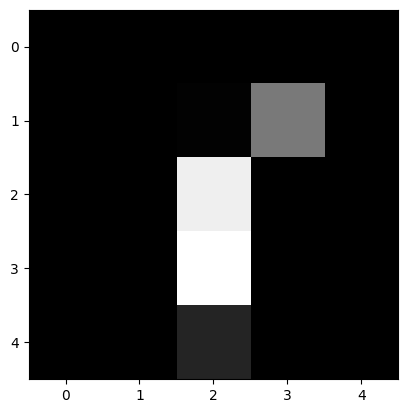

In [76]:
print(y_test[0])
img = X_test[0]
# img[132] = 1
# img[73] = 1
# img[152] = 1
plt.imshow(img.reshape(NEW_WIDTH, NEW_WIDTH), cmap='gray')

In [77]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.07058821, 0.        ,
        0.        ],
       [0.        , 0.        , 0.35999999, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08999996, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.26647048, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [78]:
X_test[y_test == 0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04764704, 0.        ,
        0.        ]])

(array([22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([0.        , 0.06372549, 0.12745098, 0.19117647, 0.25490196,
        0.31862745, 0.38235294, 0.44607843, 0.50980392, 0.57352941,
        0.6372549 ]),
 <BarContainer object of 10 artists>)

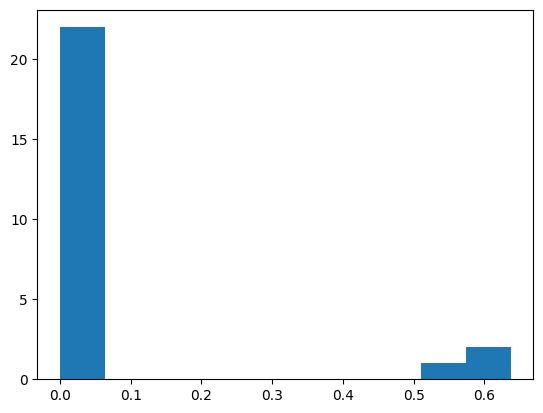

In [79]:
plt.hist(X_test[y_test == 1][22])

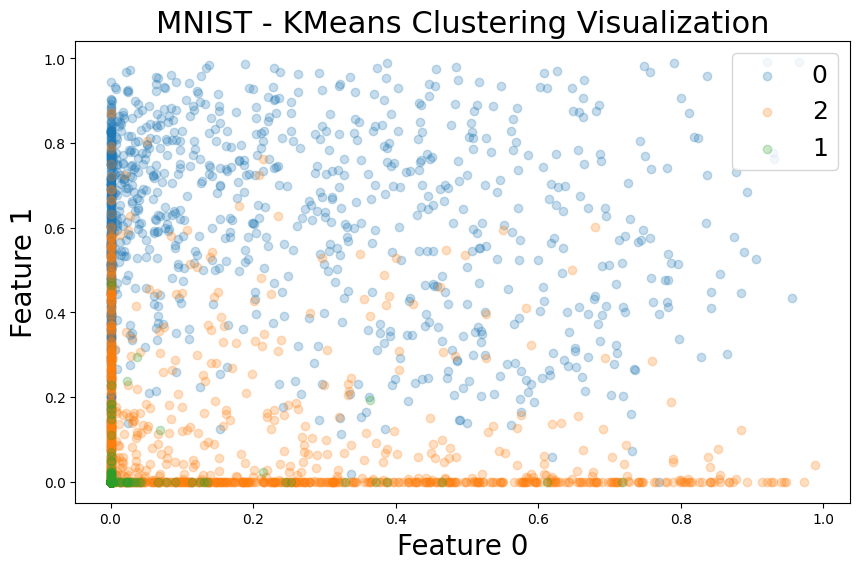

In [80]:
fontsize = 22
plt.figure(figsize=(10, 6))
d1 = 6
d2 = 11
X1 = X_test[:, d1]
X2 = X_test[:, d2]
mask0 = y_test == 0
mask1 = y_test == 1
mask2 = y_test == 2
a = 0.25
plt.scatter(X1[mask0], X2[mask0], alpha=a, label='0')
plt.scatter(X1[mask2], X2[mask2], alpha=a, label='2')
plt.scatter(X1[mask1], X2[mask1], alpha=a, label='1')

plt.title('MNIST - KMeans Clustering Visualization', fontsize=fontsize)
plt.xlabel(f'Feature 0', fontsize=fontsize-2)
plt.ylabel(f'Feature 1', fontsize=fontsize-2)
plt.legend(fontsize=fontsize-4, loc='upper right')

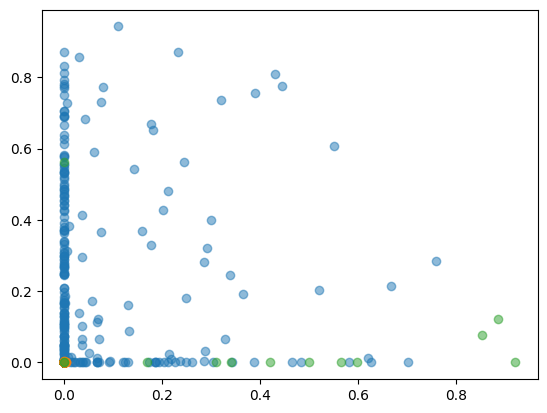

In [81]:
d1 = 6
d2 = 11
X1 = X_test[:, d1]
X2 = X_test[:, d2]
mask0 = pred == 0
mask1 = pred == 1
mask2 = pred == 2
a = 0.5
plt.scatter(X1[mask0], X2[mask0], alpha=a)
plt.scatter(X1[mask1], X2[mask1], alpha=a)
plt.scatter(X1[mask2], X2[mask2], alpha=a)

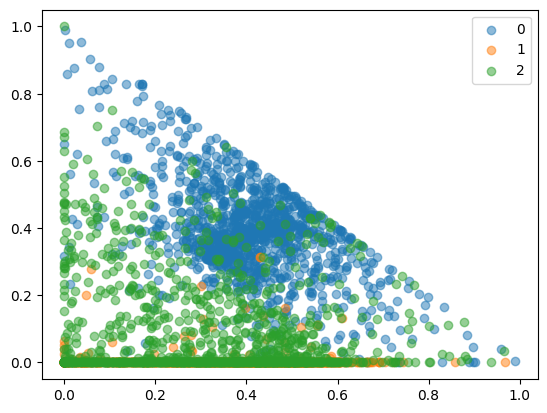

In [82]:
d1 = 7
d2 = 11
d3 = 17

X1 = X_test[:, d1]
X2 = X_test[:, d2]
X3 = X_test[:, d3]

P1 = X1 / (X1 + X2 + X3)
P2 = X2 / (X1 + X2 + X3)

mask0 = y_test == 0
mask1 = y_test == 1
mask2 = y_test == 2

a = 0.5

plt.scatter(P1[mask0], P2[mask0], alpha=a, label='0')
plt.scatter(P1[mask1], P2[mask1], alpha=a, label='1')
plt.scatter(P1[mask2], P2[mask2], alpha=a, label='2')

plt.legend()

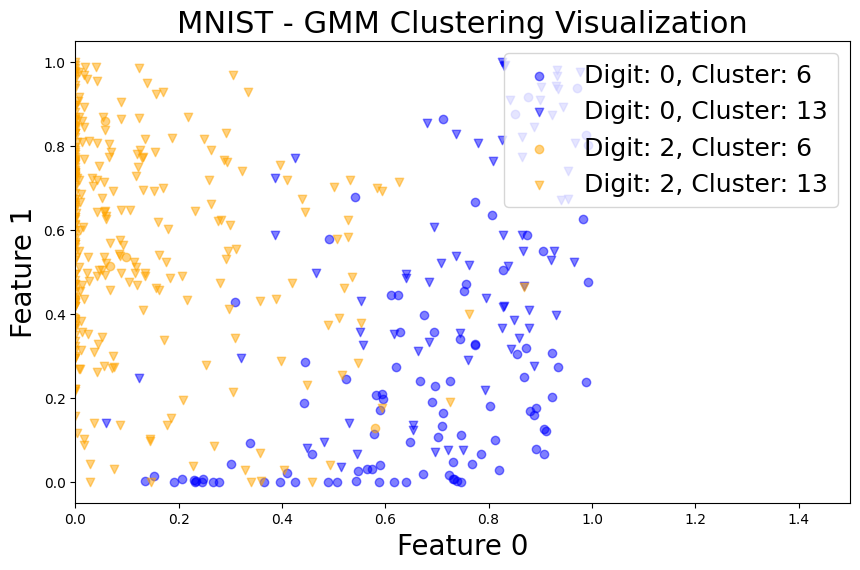

In [91]:
fontsize = 22
plt.figure(figsize=(10, 6))
# d1 = 6
# d2 = 11
# d3 = 16

# d1 = 7
# d2 = 11
# d3 = 17

# d1 = 7
# d2 = 11
# d3 = 17

d1 = 11
d2 = 17

# d1 = 12
# d2 = 16

X1 = X_test[:, d1]
X2 = X_test[:, d2]
X3 = X_test[:, d3]

P1 = X1 / (X1 + X2 + X3)
P2 = X2 / (X1 + X2 + X3)

mask0 = pred == 0
mask1 = pred == 1
mask2 = pred == 2

a = 0.5

# clusters = [2, 3]
# clusters = [11, 2]
clusters = [6, 13]
digits = [0, 2]
# shapes = ['o', 'x', 's', 'v', 'd', '^', '<', '>', 'p', 'h']
shapes = ['o', 'v']
colors = ['blue', 'orange']
for digit_i in range(len(digits)):
    for cluster_i in range(len(clusters)):
        digit = digits[digit_i]
        cluster = clusters[cluster_i]
        mask = (y_test == digit) & (pred == cluster)
        # A, B = P1[mask], P2[mask]
        A, B = X1[mask], X2[mask]
        plt.scatter(A, B, alpha=a, label=f'Digit: {digit}, Cluster: {cluster}', 
                    marker=shapes[cluster_i], color=colors[digit_i])

plt.xlim([0, 1.5])
plt.title(f'MNIST - {METHOD.NAME} Clustering Visualization', fontsize=fontsize)
plt.xlabel(f'Feature 0', fontsize=fontsize-2)
plt.ylabel(f'Feature 1', fontsize=fontsize-2)
plt.legend(fontsize=fontsize-4, loc='upper right')